# _automaton_.has_twins_property

Whether the automaton has the twins property.

- Sibling states: Two states $p$, $q$ are _siblings_ if there exist two labels $x$ and $y$ such that $p$ and $q$ can be reached from an initial state by path labeled with $x$ and there is a cycle at $p$ and $q$ both labeled with $y$.
- Twins states: Two sibling states $p$ and $q$ are _twins_ iff for any label $y$:
    $w[P(p, y, p)] = w(P[q, y, q])$
- Has twins property: An automaton has the twins property if any two sibling states of this automaton are twins. 

Preconditions:
- The automaton is not cycle ambiguous

See also:
- [_automaton_.is_cycle_ambiguous](automaton.is_cycle_ambiguous.ipynb)
- [_automaton_.determinize](automaton.determinize.ipynb)

## Examples

In [1]:
import vcsn
q = vcsn.context('lal(ab), q')
def std(e):
    return q.expression(e, 'binary').standard()

Consider the following $\mathbb{Q}$-automaton:

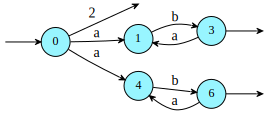

In [2]:
a = std('(ab)* + (ab)*')
a

States 1 and 4 are siblings: they can be reached from 0 with label "a" and there are two cycles in them with the same label "ba".  Since these cycles have equal weights, they are twins. This automaton has only two sibling states and they are twins so it has twins property.

In [3]:
a.has_twins_property()

True

Conversely, the following automaton does not have the twins property because states 1 and 4 are siblings but not twins: the weights of cycles differ (1 vs. 2).

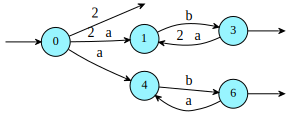

In [4]:
a = std('(<2>ab)* + (ab)*')
a

In [5]:
a.has_twins_property()

False

When the automaton has no sibling states, it has the twins property.

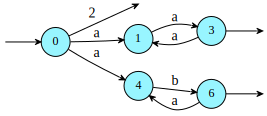

In [6]:
a = std("(aa)*+(ab)*")
a

In [7]:
a.has_twins_property()

True

In the tropical semiring ($\mathbb{Z}_{\text{min}}$), an automaton is determinizable iff the automaton has the twins property.

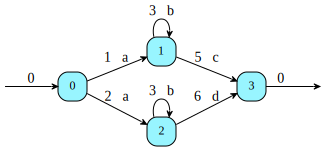

In [8]:
%%automaton a
context = "lal(abcd), zmin"
$ -> 0
0 -> 1 <1>a
0 -> 2 <2>a
1 -> 1 <3>b
1 -> 3 <5>c
2 -> 2 <3>b
2 -> 3 <6>d
3 -> $

This automaton has the twins property (the two sibling states $1$ and $2$ are twins), so it is determinizable (in $\mathbb{Z}_{\text{min}}$).

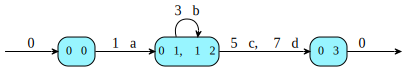

In [9]:
a.determinize()

The twins property can also be checked in $\mathbb{Z}$:

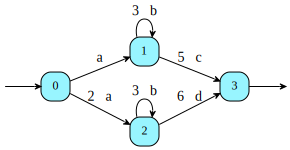

In [10]:
%%automaton a
context = "lal(abcd), z"
$ -> 0
0 -> 1 a
0 -> 2 <2>a
1 -> 1 <3>b
1 -> 3 <5>c
2 -> 2 <3>b
2 -> 3 <6>d
3 -> $

In [11]:
a.has_twins_property()

True

Or with tuples of weightsets:

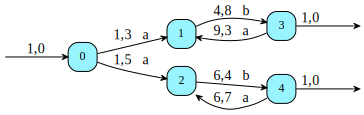

In [12]:
%%automaton a
context = "lal(abc), lat<z,zmin>"
$ -> 0
0 -> 1 <(1, 3)>a
0 -> 2 <(1, 5)>a
1 -> 3 <(4, 8)>b
3 -> $
2 -> 4 <(6, 4)>b
4 -> $
3 -> 1 <(9, 3)>a
4 -> 2 <(6, 7)>a

In [13]:
a.has_twins_property()

True